# TIN200 - Data Visualization and supervised learning for automatic processing of loan apllications

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from eli5 import explain_weights
from eli5 import explain_prediction
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score


Using TensorFlow backend.
C:\Users\peter\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\peter\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\peter\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\peter\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

#### Creating dataframes

In [2]:
train_df = pd.read_csv("DATA/train_TIN200.csv")

train_df.head(5)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
test_df = pd.read_csv("DATA/test_TIN200.csv")

test_df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


#### Check for NaN Values

In [4]:
train_df.isnull().values.any()

True

In [5]:
test_df.isnull().values.any()

True

In [6]:
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
test_df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

#### Visualize NaN values

In [8]:
import missingno as msno

<AxesSubplot:>

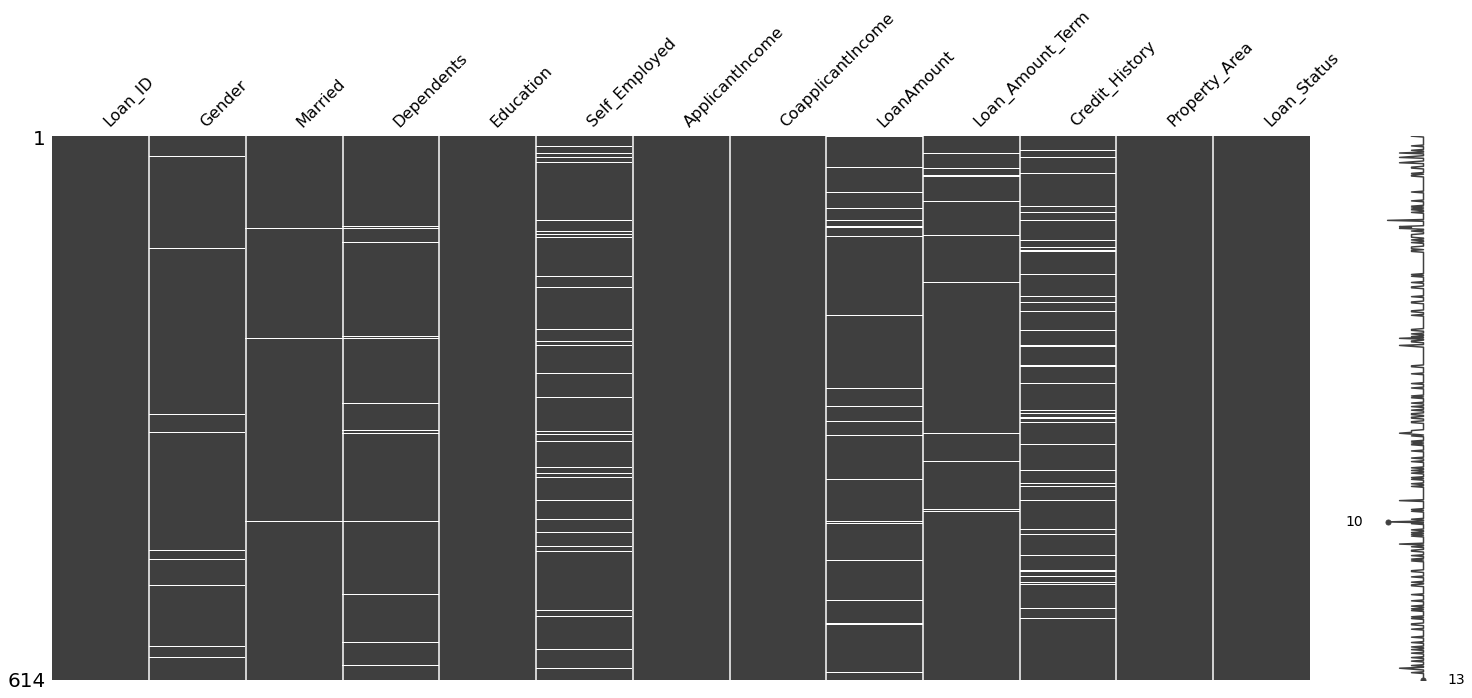

In [9]:
msno.matrix(train_df)

<AxesSubplot:>

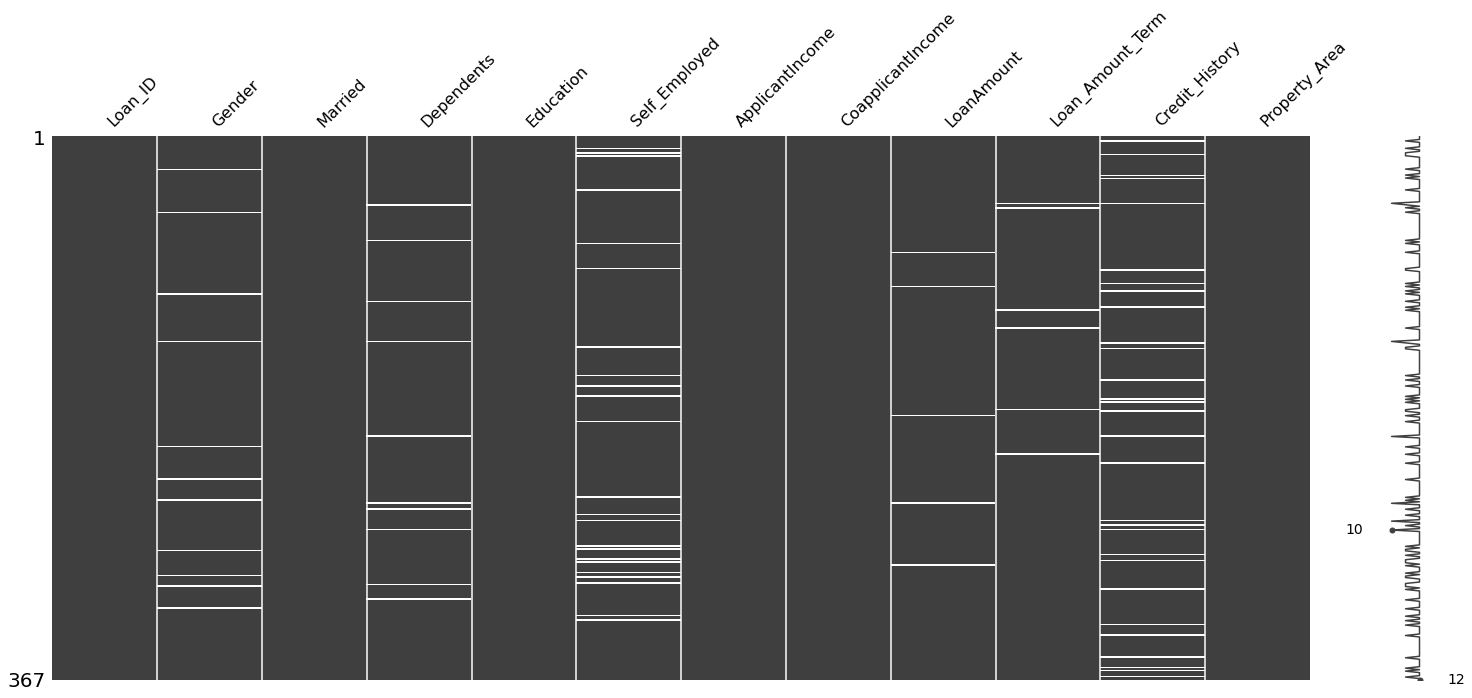

In [10]:
msno.matrix(test_df)

<AxesSubplot:>

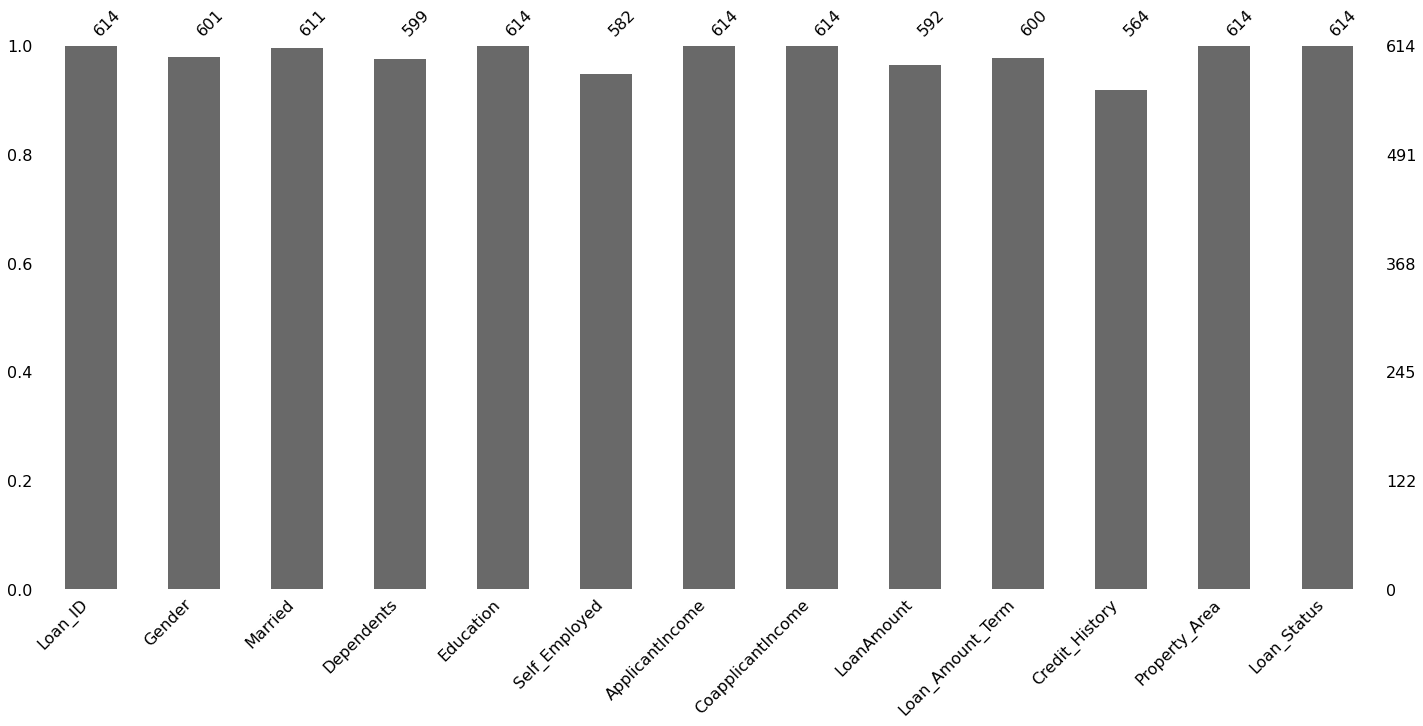

In [11]:
msno.bar(train_df)

<AxesSubplot:>

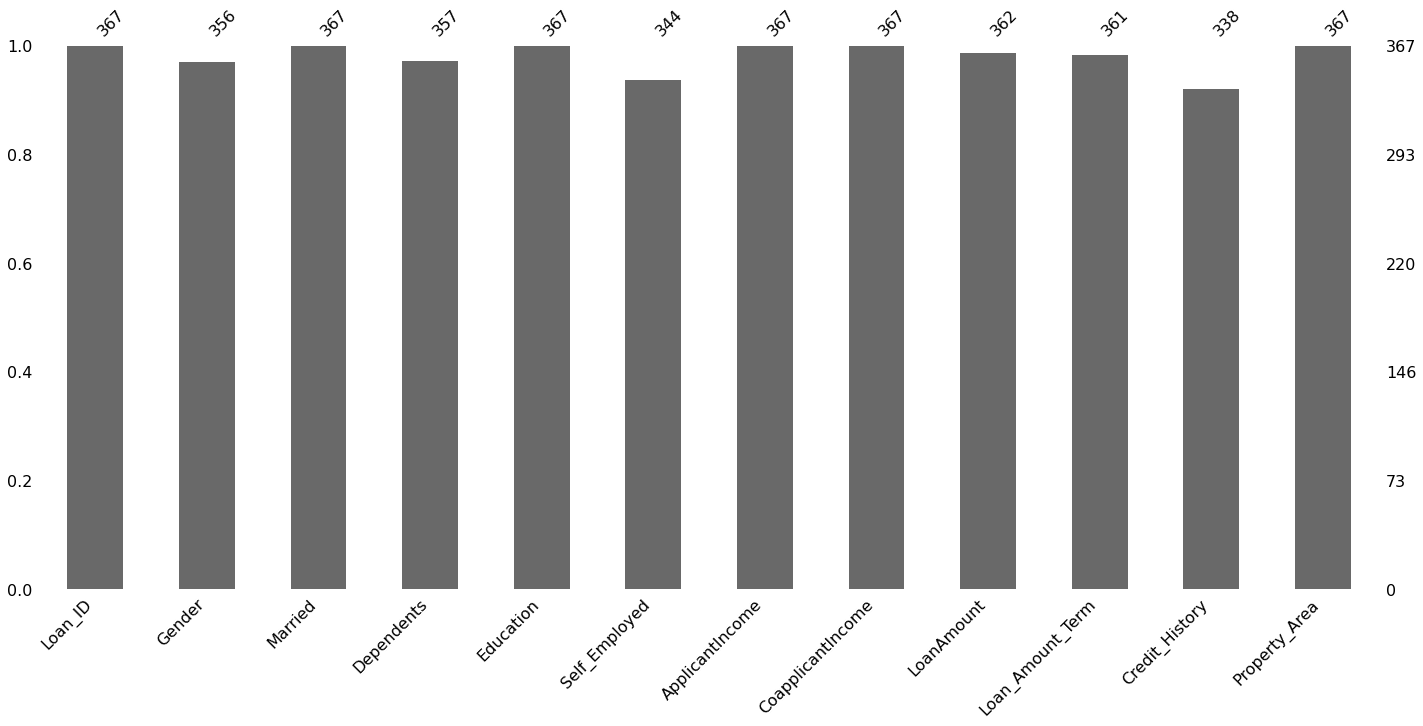

In [12]:
msno.bar(test_df)

<AxesSubplot:>

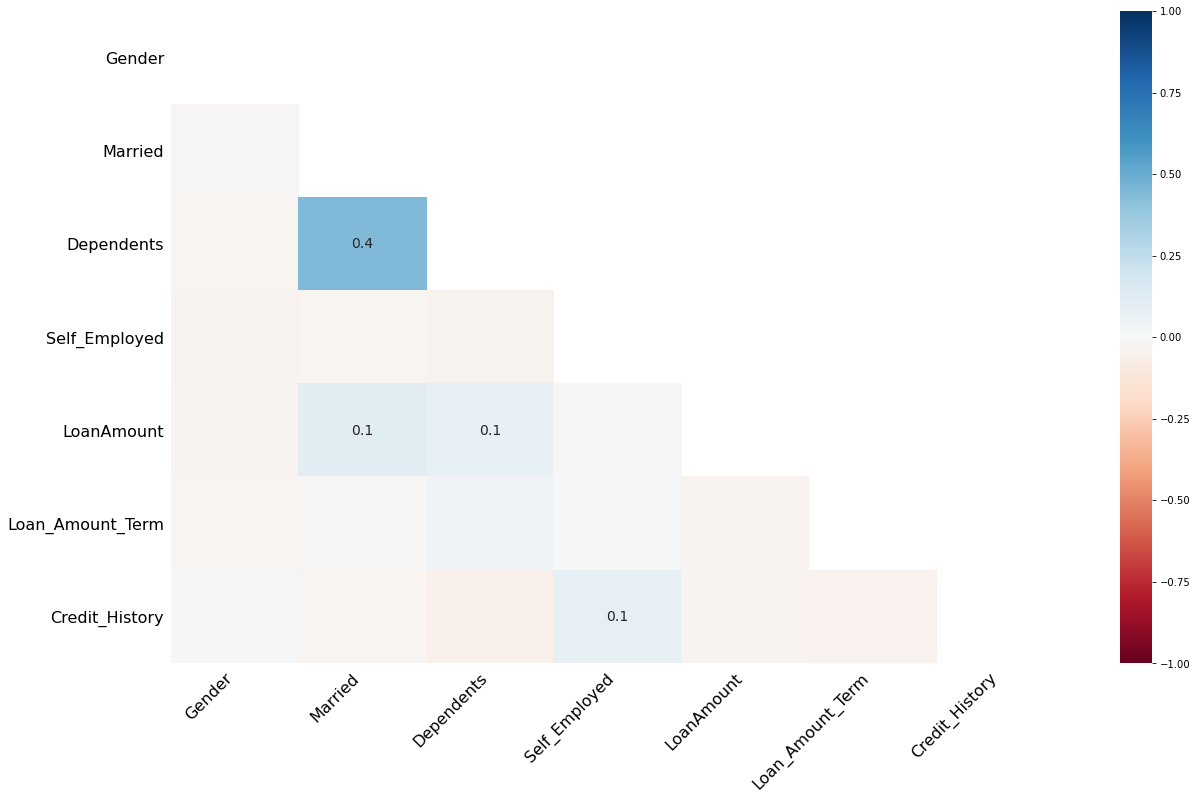

In [13]:
msno.heatmap(train_df)


<AxesSubplot:>

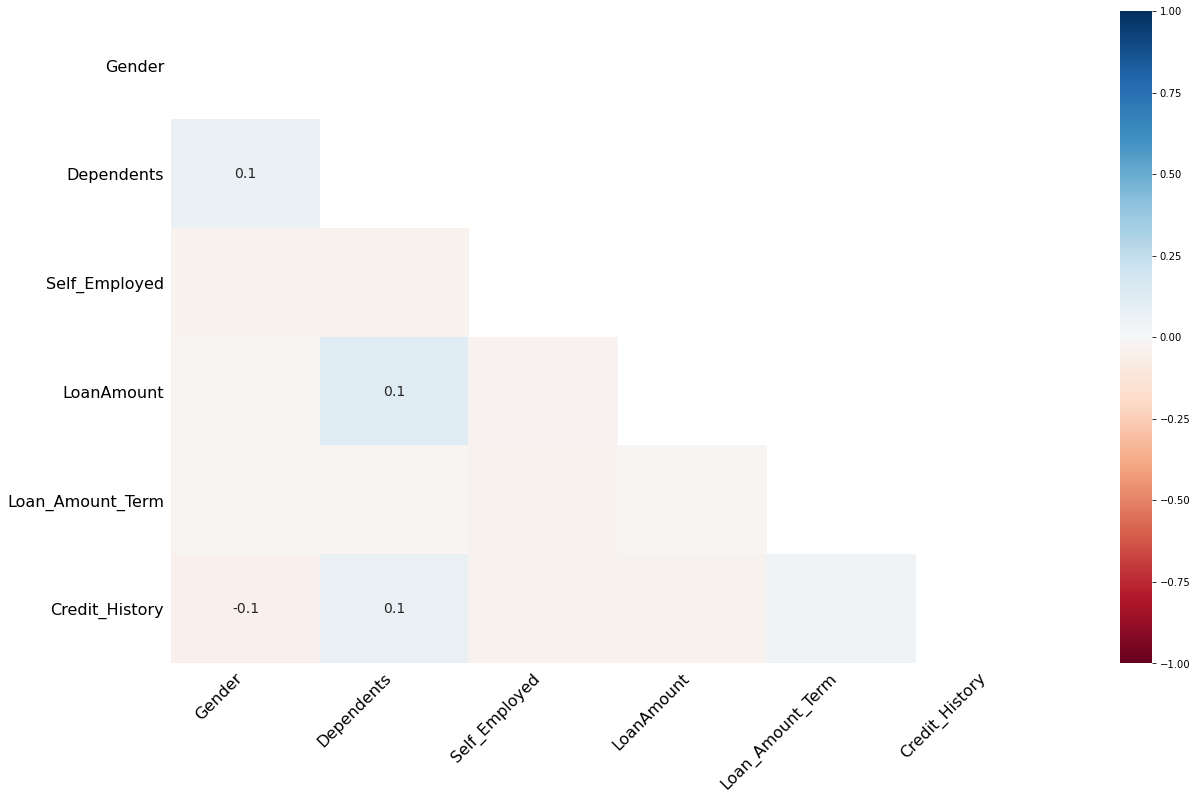

In [14]:
msno.heatmap(test_df)

In [15]:
#dropping loan_ID

train_df = train_df.drop(columns=['Loan_ID'])
test_df = test_df.drop(columns=['Loan_ID'])

#### Imputing missing values (https://medium.com/analytics-vidhya/ways-to-handle-categorical-column-missing-data-its-implementations-15dc4a56893)

In [16]:
train_df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [17]:
print("Number of Categories in: ")

for ColName in train_df[['Gender','Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']]:
    print("{} = {}".format(ColName,       len(train_df[ColName].unique())))

Number of Categories in: 
Gender = 3
Married = 3
Dependents = 5
Education = 2
Self_Employed = 3
Property_Area = 3


In [18]:
test_df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [19]:
print("Number of Categories in: ")

for ColName in test_df[['Gender','Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']]:
    print("{} = {}".format(ColName,       len(test_df[ColName].unique())))

Number of Categories in: 
Gender = 3
Married = 2
Dependents = 5
Education = 2
Self_Employed = 3
Property_Area = 3


In [20]:
#grabbed from https://medium.com/analytics-vidhya/ways-to-handle-categorical-column-missing-data-its-implementations-15dc4a56893

def impute_nan_most_frequent_category(DataFrame, ColName):
    # .mode()[0] - gives first category name
     most_frequent_category=DataFrame[ColName].mode()[0]
    
    # replace nan values with most occured category
     DataFrame[ColName + "_Imputed"] = DataFrame[ColName]
     DataFrame[ColName + "_Imputed"].fillna(most_frequent_category,inplace=True)
    
for Columns in ['Gender','Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']:
    impute_nan_most_frequent_category(train_df,Columns)
    
train_df[['Gender','Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 
          'Gender_Imputed','Married_Imputed', 'Dependents_Imputed', 'Education_Imputed', 
          'Self_Employed_Imputed', 'Property_Area_Imputed']].head(10)

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Gender_Imputed,Married_Imputed,Dependents_Imputed,Education_Imputed,Self_Employed_Imputed,Property_Area_Imputed
0,Male,No,0,Graduate,No,Urban,Male,No,0,Graduate,No,Urban
1,Male,Yes,1,Graduate,No,Rural,Male,Yes,1,Graduate,No,Rural
2,Male,Yes,0,Graduate,Yes,Urban,Male,Yes,0,Graduate,Yes,Urban
3,Male,Yes,0,Not Graduate,No,Urban,Male,Yes,0,Not Graduate,No,Urban
4,Male,No,0,Graduate,No,Urban,Male,No,0,Graduate,No,Urban
5,Male,Yes,2,Graduate,Yes,Urban,Male,Yes,2,Graduate,Yes,Urban
6,Male,Yes,0,Not Graduate,No,Urban,Male,Yes,0,Not Graduate,No,Urban
7,Male,Yes,3+,Graduate,No,Semiurban,Male,Yes,3+,Graduate,No,Semiurban
8,Male,Yes,2,Graduate,No,Urban,Male,Yes,2,Graduate,No,Urban
9,Male,Yes,1,Graduate,No,Semiurban,Male,Yes,1,Graduate,No,Semiurban


In [21]:
train_df = train_df.drop(['Gender','Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'], axis = 1)

In [22]:
train_df.isnull().sum()

ApplicantIncome           0
CoapplicantIncome         0
LoanAmount               22
Loan_Amount_Term         14
Credit_History           50
Loan_Status               0
Gender_Imputed            0
Married_Imputed           0
Dependents_Imputed        0
Education_Imputed         0
Self_Employed_Imputed     0
Property_Area_Imputed     0
dtype: int64

In [23]:
#Replacing the remainder with mean

cols = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']

for col in cols:
    train_df[col] = train_df[col].fillna(train_df[col].mean())

In [24]:
train_df.isnull().sum()

ApplicantIncome          0
CoapplicantIncome        0
LoanAmount               0
Loan_Amount_Term         0
Credit_History           0
Loan_Status              0
Gender_Imputed           0
Married_Imputed          0
Dependents_Imputed       0
Education_Imputed        0
Self_Employed_Imputed    0
Property_Area_Imputed    0
dtype: int64

#### Doing the same for the test set

In [25]:
for Columns in ['Gender','Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']:
    impute_nan_most_frequent_category(test_df,Columns)
    
test_df[['Gender','Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 
          'Gender_Imputed','Married_Imputed', 'Dependents_Imputed', 'Education_Imputed', 
          'Self_Employed_Imputed', 'Property_Area_Imputed']].head(10)

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Gender_Imputed,Married_Imputed,Dependents_Imputed,Education_Imputed,Self_Employed_Imputed,Property_Area_Imputed
0,Male,Yes,0,Graduate,No,Urban,Male,Yes,0,Graduate,No,Urban
1,Male,Yes,1,Graduate,No,Urban,Male,Yes,1,Graduate,No,Urban
2,Male,Yes,2,Graduate,No,Urban,Male,Yes,2,Graduate,No,Urban
3,Male,Yes,2,Graduate,No,Urban,Male,Yes,2,Graduate,No,Urban
4,Male,No,0,Not Graduate,No,Urban,Male,No,0,Not Graduate,No,Urban
5,Male,Yes,0,Not Graduate,Yes,Urban,Male,Yes,0,Not Graduate,Yes,Urban
6,Female,No,1,Not Graduate,No,Semiurban,Female,No,1,Not Graduate,No,Semiurban
7,Male,Yes,2,Not Graduate,No,Rural,Male,Yes,2,Not Graduate,No,Rural
8,Male,Yes,2,Graduate,NaN,Urban,Male,Yes,2,Graduate,No,Urban
9,Male,No,0,Not Graduate,No,Semiurban,Male,No,0,Not Graduate,No,Semiurban


In [26]:
test_df = test_df.drop(['Gender','Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'], axis = 1)

In [27]:
cols = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']

for col in cols:
    test_df[col] = test_df[col].fillna(test_df[col].mean())

#### All the NaN-values are dealt with and we can now visualize the sets

C:\Users\peter\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\peter\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\peter\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


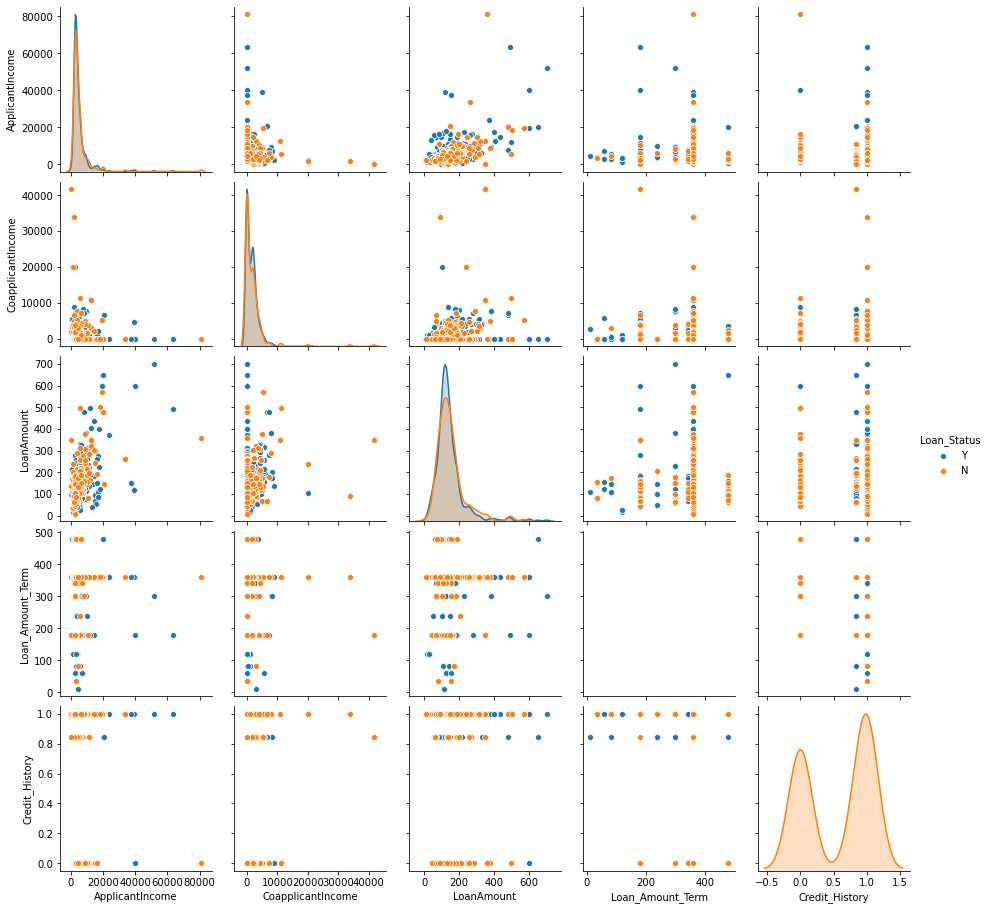

In [28]:
sns.pairplot(data=train_df, hue='Loan_Status')

#### preprocessing

In [29]:
def label_encode(column_name, DataFrame):
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    DataFrame[column_name] = le.fit_transform(DataFrame[column_name])
    
cols = ['Gender_Imputed', 'Married_Imputed', 'Dependents_Imputed', 
        'Education_Imputed', 'Self_Employed_Imputed', 
        'Property_Area_Imputed', 'Loan_Status']

#le = LabelEncoder()
#train_df['Married_Imputed'] = le.fit_transform(train_df['Married_Imputed'])

for col in cols:
    label_encode(col, train_df)
    

In [30]:
train_df.head(5)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Imputed,Married_Imputed,Dependents_Imputed,Education_Imputed,Self_Employed_Imputed,Property_Area_Imputed
0,5849,0.0,146.412162,360.0,1.0,1,1,0,0,0,0,2
1,4583,1508.0,128.000000,360.0,1.0,0,1,1,1,0,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,1,0,0,1,2
3,2583,2358.0,120.000000,360.0,1.0,1,1,1,0,1,0,2
4,6000,0.0,141.000000,360.0,1.0,1,1,0,0,0,0,2


In [31]:
cols = ['Gender_Imputed', 'Married_Imputed', 'Dependents_Imputed', 
        'Education_Imputed', 'Self_Employed_Imputed', 'Property_Area_Imputed']

#le = LabelEncoder()
#train_df['Married_Imputed'] = le.fit_transform(train_df['Married_Imputed'])

for col in cols:
    label_encode(col, test_df)

In [32]:
train_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Imputed,Married_Imputed,Dependents_Imputed,Education_Imputed,Self_Employed_Imputed,Property_Area_Imputed
0,5849,0.0,146.412162,360.0,1.0,1,1,0,0,0,0,2
1,4583,1508.0,128.000000,360.0,1.0,0,1,1,1,0,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,1,0,0,1,2
3,2583,2358.0,120.000000,360.0,1.0,1,1,1,0,1,0,2
4,6000,0.0,141.000000,360.0,1.0,1,1,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,1,0,0,0,0,0,0
610,4106,0.0,40.000000,180.0,1.0,1,1,1,3,0,0,0
611,8072,240.0,253.000000,360.0,1.0,1,1,1,1,0,0,2
612,7583,0.0,187.000000,360.0,1.0,1,1,1,2,0,0,2


#### Now that the data is prepared we can create splits

In [33]:
#making target (loan_status) last column
train_df = train_df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 
                     'Loan_Amount_Term', 'Credit_History', 'Gender_Imputed', 
                     'Married_Imputed', 'Dependents_Imputed', 'Education_Imputed', 
                     'Self_Employed_Imputed', 'Property_Area_Imputed', 'Loan_Status']]

In [34]:
#importing train_test_split
from sklearn.model_selection import train_test_split

### Train and test

In [35]:
X = train_df.drop(['Loan_Status'],axis=1)
y = train_df['Loan_Status']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rfc = RandomForestClassifier(n_estimators=50, random_state=70)
rfc.fit(X_train, y_train)
rfc_train =rfc.predict(X_train)
rfc_test  = rfc.predict(X_test)

In [39]:
print(accuracy_score(y_test, rfc_test))

rfc.score(X_test,y_test)

0.7980295566502463


0.7980295566502463

In [40]:
rfc.fit(X,y)
rfc_full_test = rfc.predict(X)
print(accuracy_score(y, rfc_full_test))


0.998371335504886


### Cross validation

In [41]:
from sklearn.model_selection import cross_val_score

cross_score = cross_val_score(rfc,X, y, cv=10)
print('CV accuracy scores: %s' % cross_score)


CV accuracy scores: [0.79032258 0.77419355 0.72580645 0.72580645 0.7704918  0.80327869
 0.81967213 0.78688525 0.75409836 0.83606557]


In [42]:
explain_weights(rfc)

Weight,Feature
0.2765 ± 0.1047,x4
0.2051 ± 0.0712,x0
0.1862 ± 0.0646,x2
0.1117 ± 0.0524,x1
0.0468 ± 0.0386,x10
0.0448 ± 0.0307,x3
0.0438 ± 0.0348,x7
0.0252 ± 0.0274,x6
0.0251 ± 0.0234,x8
0.0185 ± 0.0196,x9


In [43]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


In [44]:
xgb = XGBClassifier(random_state=70)
xgb.fit(X_train, y_train)

xg_train = xgb.predict(X_train)
#xg_test = xgb.predict(X_test)


[11:51:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\peter\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [45]:
grid = [{'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
         'max_depth': [1,2,3],
         'n_estimators': [100, 1000, 3000, 5000, 8000]}]

gs = GridSearchCV(estimator= xgb,
                param_grid= grid,
                scoring='r2',
                n_jobs=-1)


In [46]:
gs = gs.fit(X_train, y_train)

[12:03:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\peter\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [47]:
print(gs.best_score_)
print(gs.best_params_)

0.10547438145334129
{'learning_rate': 0.0001, 'max_depth': 1, 'n_estimators': 100}


In [48]:
op_xgb = XGBClassifier(learing_rate=0.0001, max_depth=1, n_estimators=100 )
op_xgb.fit(X,y)


[12:03:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "learing_rate" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:03:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learing_rate=0.0001, learning_rate=0.300000012, max_delta_step=0,
              max_depth=1, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [49]:
op_exg_pred = op_xgb.predict(X)
print(accuracy_score(y, op_exg_pred))


0.8159609120521173


In [50]:
y.to_csv('y.csv', index = False, header=True)

In [51]:
X.to_csv('full_fix_data.csv', index = False, header=True)

### SVC

In [52]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler


In [53]:
pipe_svc = make_pipeline(StandardScaler(), SVC(random_state=70))
pipe_svc.get_params()


{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('svc', SVC(random_state=70))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'svc': SVC(random_state=70),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'svc__C': 1.0,
 'svc__break_ties': False,
 'svc__cache_size': 200,
 'svc__class_weight': None,
 'svc__coef0': 0.0,
 'svc__decision_function_shape': 'ovr',
 'svc__degree': 3,
 'svc__gamma': 'scale',
 'svc__kernel': 'rbf',
 'svc__max_iter': -1,
 'svc__probability': False,
 'svc__random_state': 70,
 'svc__shrinking': True,
 'svc__tol': 0.001,
 'svc__verbose': False}

In [54]:
param_range  = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0] # For regularization parameter C.
param_range2 = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]         # For scaling parameter gamma og rbf-kernel.

param_grid   = [{'svc__C': param_range, 'svc__kernel': ['linear']},
                {'svc__C': param_range, 'svc__gamma': param_range2, 'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10,
                  n_jobs=-1)


In [55]:
gs = gs.fit(X_train, y_train)


In [56]:
print(gs.best_score_)
print(gs.best_params_)
clf = gs.best_estimator_
clf

0.8151567944250872
{'svc__C': 0.01, 'svc__kernel': 'linear'}


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.01, kernel='linear', random_state=70))])

In [57]:
cross_score = cross_val_score(xgb, X, y,  cv=10)
print('CV accuracy scores: %s' % cross_score)

[12:16:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:16:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

C:\Users\peter\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[12:16:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:16:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:16:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:16:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_re

In [58]:
print('Test accuracy: %.3f' % clf.score(X_test, y_test))
print('Test accuracy: %.3f' % gs.score(X_test, y_test))
gs.cv_results_['mean_test_score']


Test accuracy: 0.798
Test accuracy: 0.798


array([0.70801394, 0.70801394, 0.81515679, 0.81515679, 0.81515679,
       0.81515679, 0.81515679, 0.81515679, 0.70801394, 0.70801394,
       0.70801394, 0.70801394, 0.70801394, 0.70801394, 0.70801394,
       0.70801394, 0.70801394, 0.70801394, 0.70801394, 0.70801394,
       0.70801394, 0.70801394, 0.70801394, 0.70801394, 0.70801394,
       0.70801394, 0.70801394, 0.70801394, 0.70801394, 0.70801394,
       0.70801394, 0.70801394, 0.73722416, 0.70801394, 0.70801394,
       0.70801394, 0.70801394, 0.70801394, 0.81271777, 0.81027875,
       0.73960511, 0.69819977, 0.70313589, 0.70801394, 0.81515679,
       0.81515679, 0.77125436, 0.73461092, 0.71033682, 0.69581882,
       0.81515679, 0.81515679, 0.7981417 , 0.72003484, 0.72003484,
       0.71283391, 0.69581882, 0.81515679, 0.81515679, 0.77142857,
       0.68101045, 0.73217189, 0.71283391, 0.69581882])

In [60]:
clf.fit(X,y)
clf_pred_x = clf.predict(X)
gs.cv_results_['mean_test_score']
accuracy_score(y, clf_pred_x)


0.8094462540716613

In [61]:
cross_score = cross_val_score(clf, X, y,  cv=10)
print('CV accuracy scores: %s' % cross_score)


CV accuracy scores: [0.80645161 0.82258065 0.77419355 0.75806452 0.78688525 0.78688525
 0.86885246 0.85245902 0.80327869 0.83606557]


In [63]:
explain_weights(clf)


Weight?,Feature
+0.699,x4
+0.685,<BIAS>
+0.000,x3
+0.000,x5
+0.000,x6
+0.000,x10
-0.000,x0
-0.000,x1
-0.000,x7
-0.000,x8


In [64]:
from eli5.xgboost import explain_weights_xgboost

explain_weights_xgboost(xgb)


Weight,Feature
0.4218,Credit_History
0.0884,Self_Employed_Imputed
0.0830,Loan_Amount_Term
0.0608,Education_Imputed
0.0580,CoapplicantIncome
0.0533,ApplicantIncome
0.0511,LoanAmount
0.0478,Gender_Imputed
0.0471,Property_Area_Imputed
0.0458,Dependents_Imputed


### SFC

In [65]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


In [70]:
# Prepare SFS
sfs = SFS(rfc, 
          k_features=(1, 11), 
          cv=10)

sfs = sfs.fit(X, y)

In [107]:
subset = sfs.subsets_
best_subset = subset[4]

df = pd.DataFrame(list(best_subset.items()))

#for i in best_subset:
#    print(i, best_subset[i])
    
d = {'feature_names': ['Credit_History', 'Gender_Imputed', 'Married_Imputed', 'Education_Imputed']}
df_top_features = pd.DataFrame(data=d)
df_top_features

,feature_names
0,Credit_History
1,Gender_Imputed
2,Married_Imputed
3,Education_Imputed


In [73]:
sfs.k_feature_idx_

(4, 5, 6, 8)

In [67]:
from eli5.xgboost import explain_weights_xgboost
from eli5.sklearn.explain_prediction import explain_prediction_tree_regressor
from eli5.sklearn.explain_prediction import explain_prediction_tree_classifier

In [68]:
#explain_prediction_tree_classifier(rfc, doc=None)